In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Rubysmita/csvfile/main/avocado.csv")

In [7]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


 Exploratory Data Analysis

In [8]:
df.drop("Unnamed: 0", axis=1, inplace=True)

Here we drop all the unnmaed columns

In [9]:
df.shape

(18249, 13)

Here is the shape of our datset

In [10]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Here we taking a look of all the columns present in our dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Here is our dataset contain 9 float,1 integer ,3 object datatype

In [12]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

The dataset have no null values

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In this method we are able to see the numerical columns

In [14]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

We found all the unique values in our dataset

In [15]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [16]:
df['Year'],df['Month'],df['Day']=df['Date'].str.split('-').str
df.drop(columns=['Date','year'],inplace=True)

In [17]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


I have separated the Date columns into 3 columns in year month ,day

In [18]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'],inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


We separated the date columns we can see the object datatype

conventional    9126
organic         9123
Name: type, dtype: int64


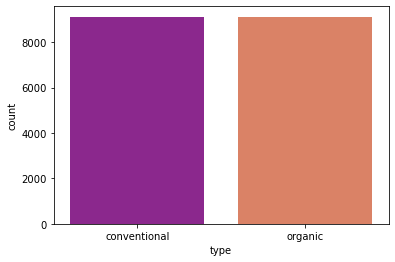

In [19]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df,palette="plasma")
plt.show()

In the "type" columns we have datapoints for conventional and organic avocado

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


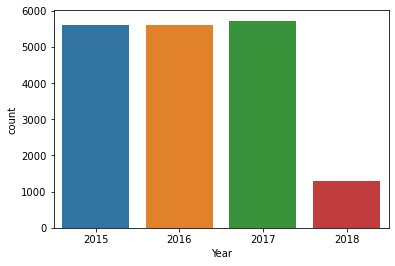

In [20]:
print(df['Year'].value_counts())
sns.countplot(x='Year',data=df)
plt.show()

In the year columns 2018 have very less as compared to the others

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


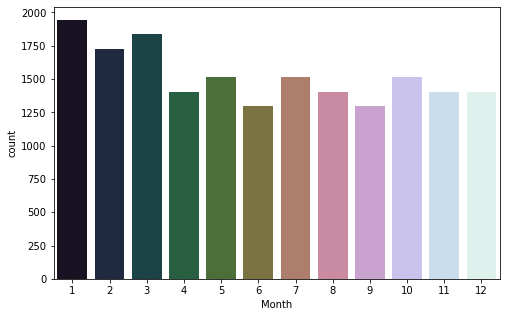

In [21]:
print(df['Month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Month',data=df,palette="cubehelix")
plt.show()

We can see the least data points in the month of june i.e 6 and highest data points in the month of jan .

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Date, dtype: int64


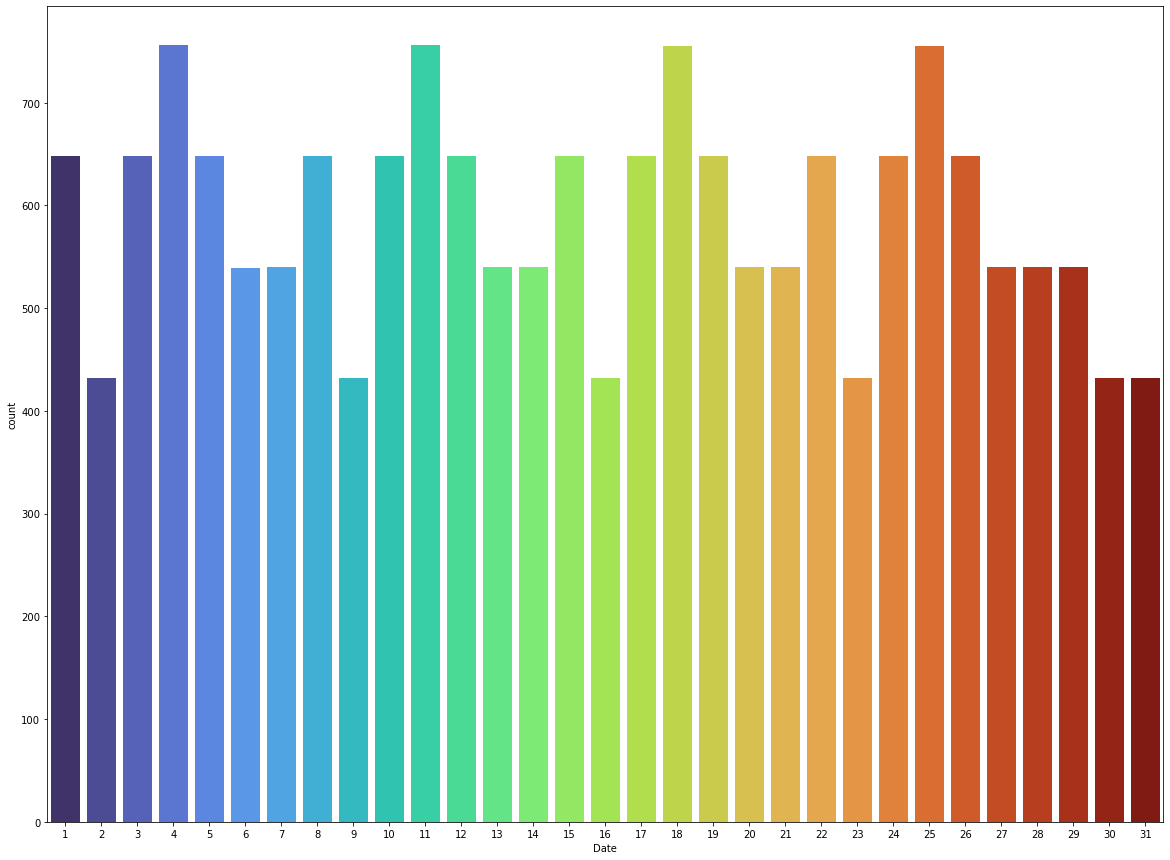

In [22]:
print(df['Date'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Date',data=df,palette="turbo")
plt.show()

We see 11 is the highest data points and 4 have lowest

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

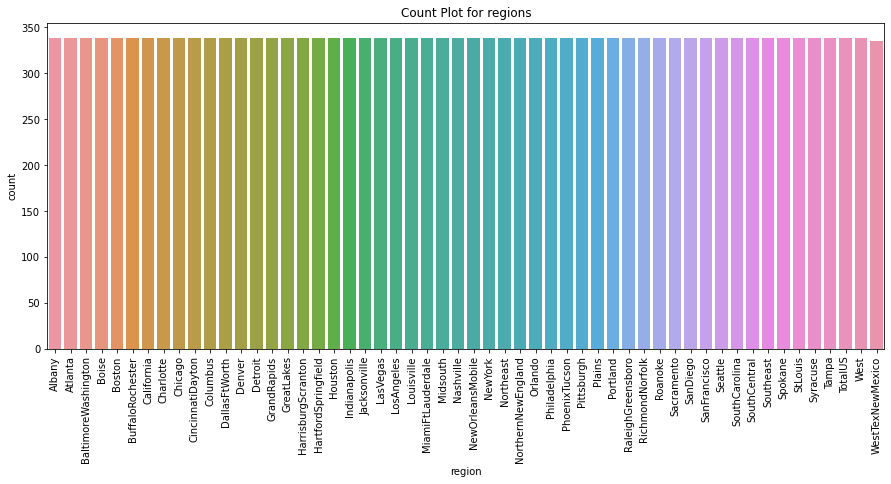

In [23]:
print(df['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x='region',data=df)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

In the above columns all the values are almost same as compared to westexnewmexxicon

<Figure size 1080x720 with 0 Axes>

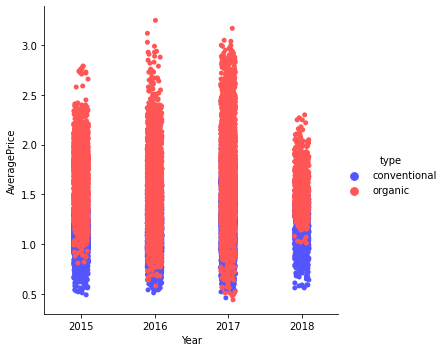

In [24]:
plt.figure(figsize=(15,10))
sns.catplot(x = "Year",y = 'AveragePrice',hue="type",data=df,palette="seismic")
plt.show()

In the above plot we see the average price information of year and how conventional and unconventional types are sold

<Figure size 1080x720 with 0 Axes>

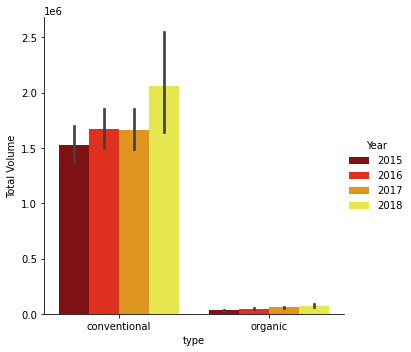

In [25]:
plt.figure(figsize=(15,10))
sns.catplot(x = "type",y = 'Total Volume',hue="Year",kind="bar",data=df,palette="hot")
plt.show()

In the above bar we see that total volume for conventional type were high in all 4 yearswhen its comapred to organic 

<Figure size 1080x720 with 0 Axes>

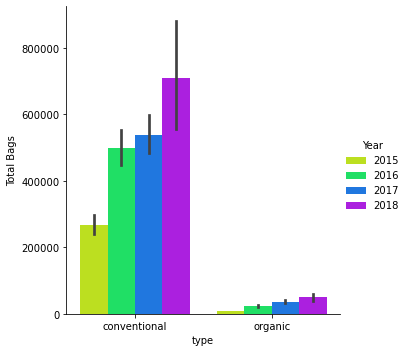

In [26]:
plt.figure(figsize=(15,10))
sns.catplot(x = "type",y = 'Total Bags',hue="Year",kind="bar",data=df,palette="hsv")
plt.show()

In the above bar we see that total volume for conventional type were high always but we seethat total bags in high adn specially highest in 2018

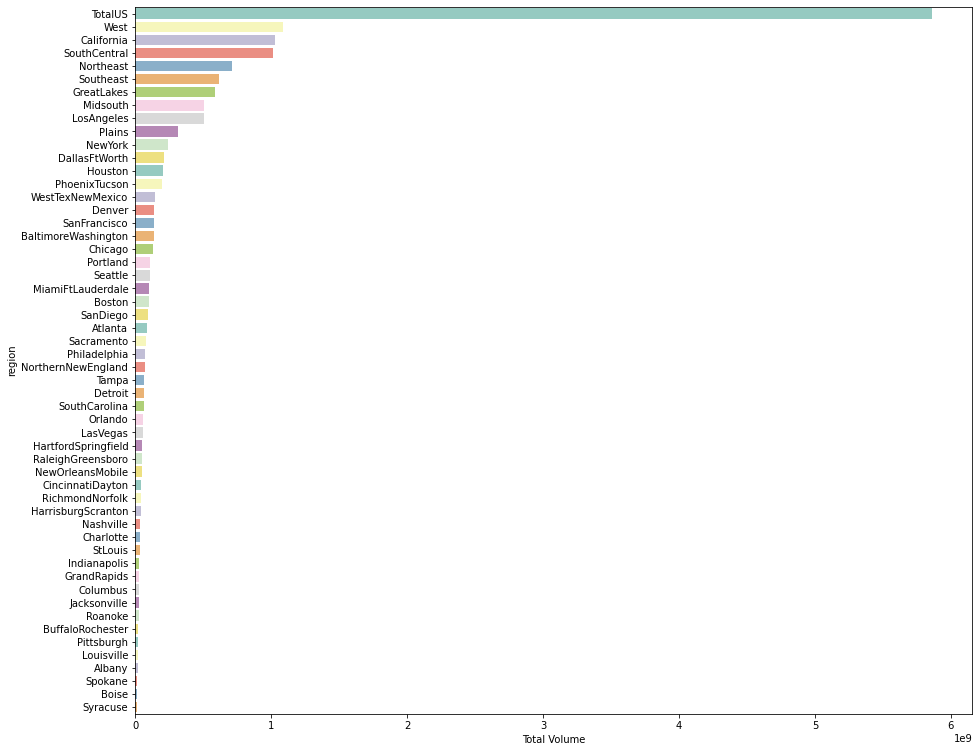

In [27]:
region =df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"],y=region["region"],data=df,palette="Set3")
plt.show()

When compared to the total US area per region values are lesser but we can see that major contribution in region are west,california,mid south,etc.

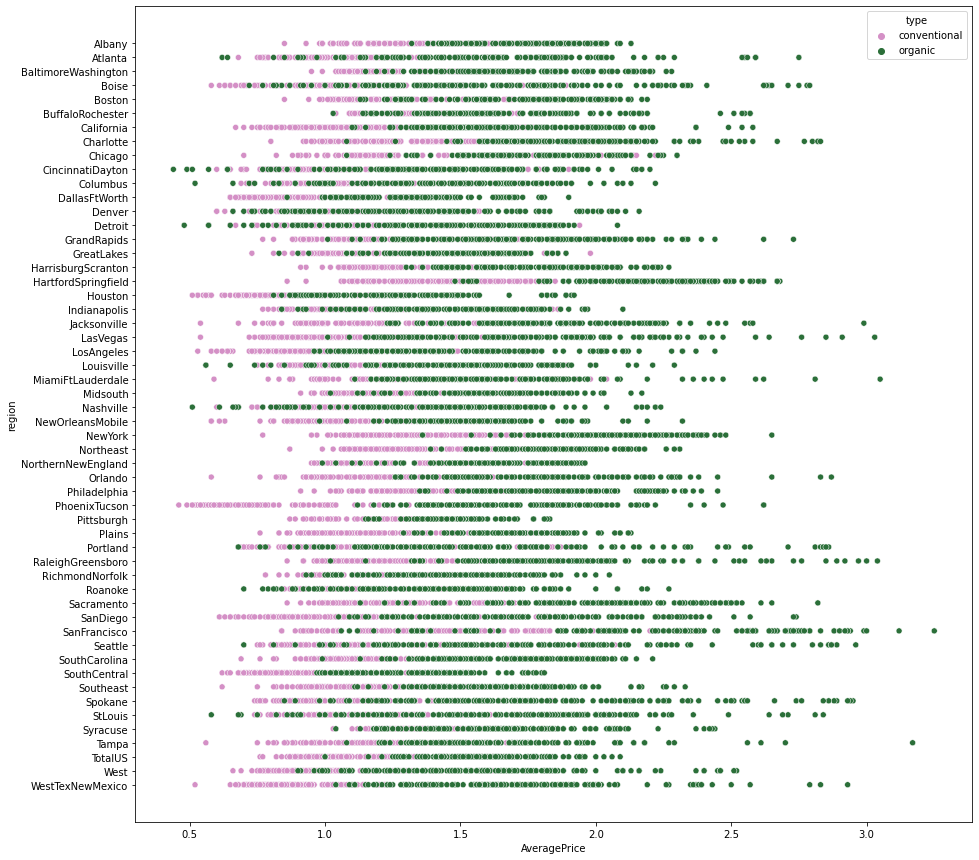

In [28]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = "AveragePrice",y = 'region',hue="type",data=df,palette="cubehelix_r")
plt.show()

In the above plot we see that organic avogados are high priced than conventional avogados

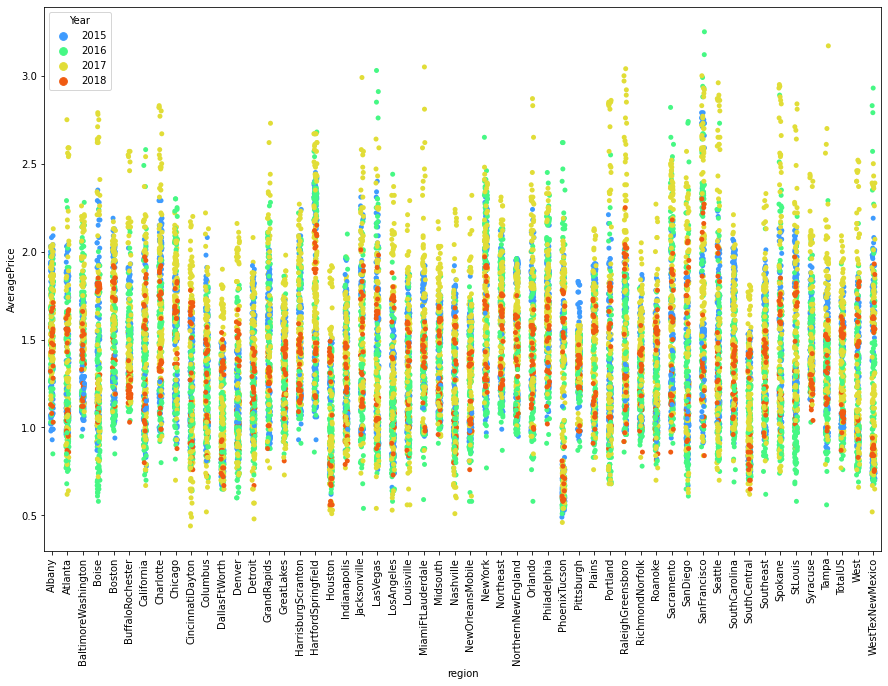

In [29]:
plt.figure(figsize=(15,10))
sns.stripplot(x = "region",y = 'AveragePrice',hue="Year",data=df,palette="turbo")
plt.xticks(rotation=90)
plt.show()

In the above plot we see that THE AVG PRICE of avocados over all the 4 years.

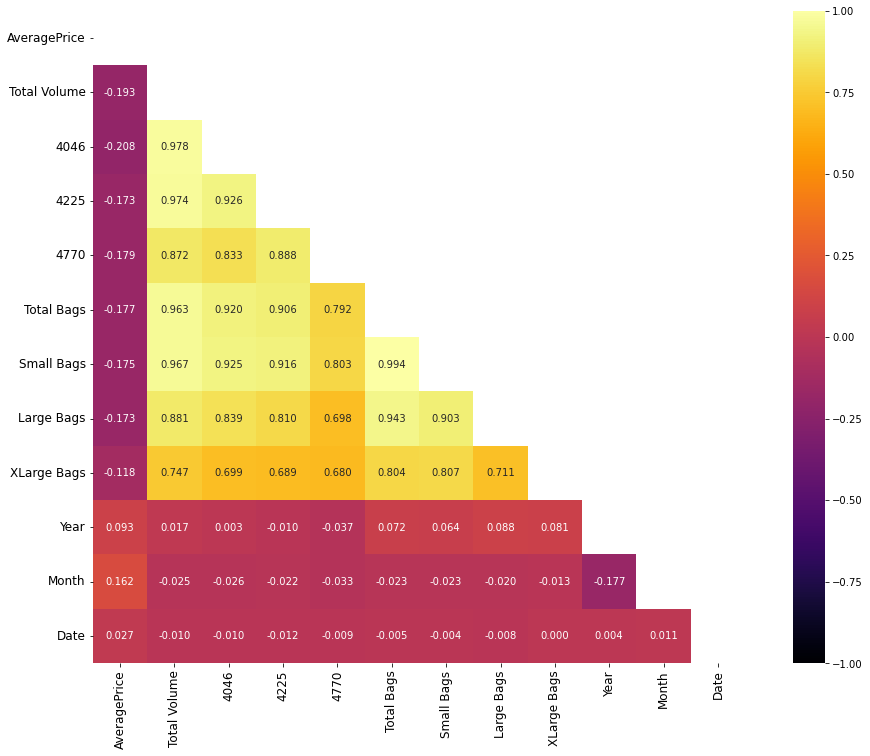

In [30]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the above heatmap we understand the muticolinearity present in our dataset.

In [31]:
df.drop(["4046","4225","4770","Small Bags","Large Bags","XLarge Bags"],axis=1,inplace=True)

In [32]:
oe = OrdinalEncoder()
df['region'] = oe.fit_transform(df['region'].values.reshape(-1,1))
df['type'] = oe.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Date
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


By using ordinal encoding we have changed the object datatype to numeric datatype.

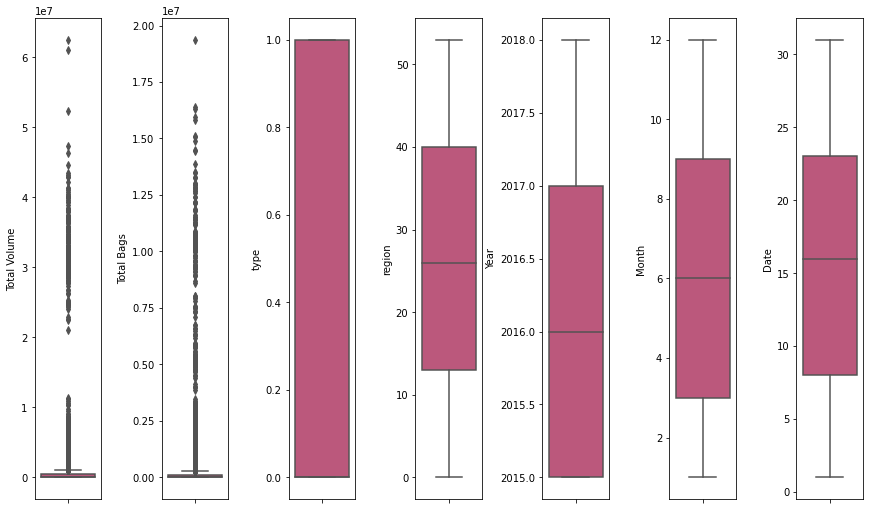

In [33]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice",axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

We see some outliers present in the dataset

USING Z SCORE TO REMOVE OUTLIERS

In [34]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print("Shape of the dataframe before removing outliers",df.shape)
print("Shape of the dataframe after removing outliers",df1.shape)
print("Percentage of data loss post outliers removal", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers (18249, 8)
Shape of the dataframe after removing outliers (17931, 8)
Percentage of data loss post outliers removal 1.7425612362321221


I HAVE SUCESSFULLY REMOVE THE OUTLIERS

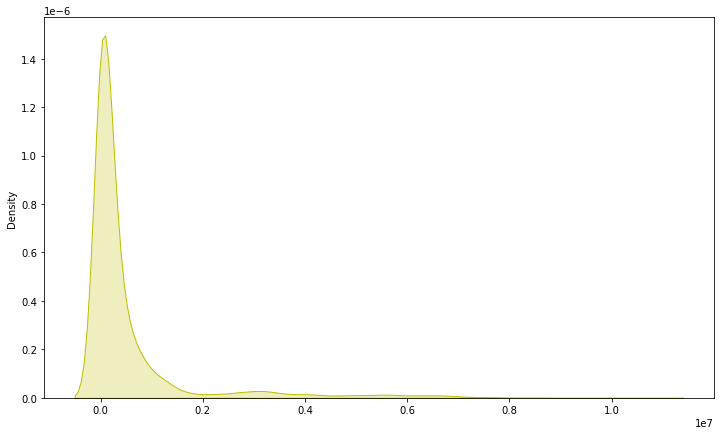

In [35]:
plt.figure(figsize=(12,7))
sns.distplot(x = df["Total Volume"],hist=False,color="y",kde_kws={"shade":True})
plt.show()

We see the right skewness in the column of total volumethat had too outliers

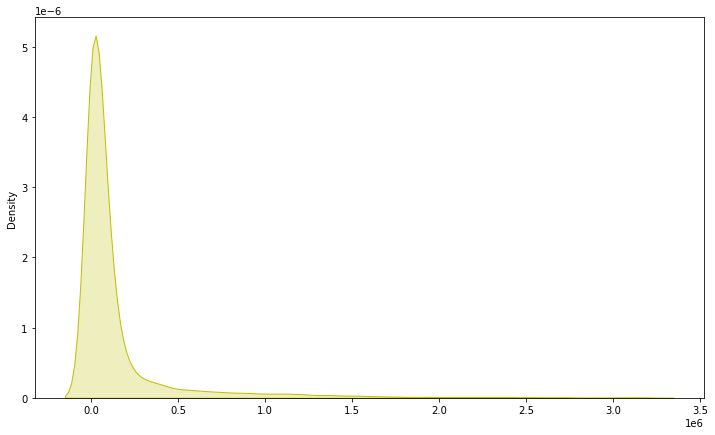

In [36]:
plt.figure(figsize=(12,7))
sns.distplot(x = df["Total Bags"],hist=False,color="y",kde_kws={"shade":True})
plt.show()

USING log transform to fix skewness

In [37]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

i applied log transform to remove skewness of our dataset.

In [38]:
df.skew()

AveragePrice    0.388855
Total Volume   -0.024234
Total Bags     -0.334742
type           -0.005912
region          0.014808
Year            0.225227
Month           0.114771
Date            0.014381
dtype: float64

Splitting the dataset into 2 variables

In [39]:
X = df.drop('AveragePrice', axis=1)
Y = df['AveragePrice']

X represent the feature column and Y represent the target column.

Feature scaling

In [40]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head(10)

,Total Volume,Total Bags,type,region,Year,Month,Date
0,-0.090582,-0.493196,-1.00296,-1.694204,-1.215795,1.650340,1.291781
1,-0.161393,-0.452528,-1.00296,-1.694204,-1.215795,1.650340,0.493909
2,0.183695,-0.523161,-1.00296,-1.694204,-1.215795,1.650340,-0.303964
3,0.002395,-0.677598,-1.00296,-1.694204,-1.215795,1.650340,-1.101837
4,-0.193989,-0.649161,-1.00296,-1.694204,-1.215795,1.367566,1.519745
5,-0.152446,-0.613603,-1.00296,-1.694204,-1.215795,1.367566,0.721872
6,0.027100,-0.513521,-1.00296,-1.694204,-1.215795,1.367566,-0.076001
7,0.148946,-0.603766,-1.00296,-1.694204,-1.215795,1.367566,-0.873873
8,0.107584,-0.369872,-1.00296,-1.694204,-1.215795,1.367566,-1.671746
9,-0.024906,-0.496942,-1.00296,-1.694204,-1.215795,1.084793,1.063818


I  am scaling my feature data to ensure that tere is no issue with the data biasness over a particular period.

Finding best random state for building REGRESSION models

In [41]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test,pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
        
print("Best R2 score is",maxAccu,"on Random State",maxRS)  

Best R2 score is 0.5021238214614996 on Random State 144


we found our lucky number is 144.

CREATING A TRAINING AND TESTING DATASET

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=144)

MACHINE LEARNING MODEL REGRESSION WITH EVALUTION MATRIX

In [43]:
def reg(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=708)
    
    model.fit(X_train,Y_train)
    
    pred = model.predict(X_test)
    
    rmse = mean_squared_error(Y_test,pred,squared=False)
    print("RMSE Score is :",rmse)
    
    r2 = r2_score(Y_test,pred,multioutput='variance_weighted')*100
    print("R2 score is:",r2)
    
    cv_score = (cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    
    result = r2 - cv_score
    print("R2 score - Cross Validation Score is",result)

In [44]:
#Linear Regression

model=LinearRegression()
reg(model,X,Y)

RMSE Score is : 0.2843241073646302
R2 score is: 47.91662124818624
Cross Validation Score: 12.299369206677364
R2 score - Cross Validation Score is 35.61725204150888


In [45]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is : 0.28468212924064595
R2 score is: 47.78537153236971
Cross Validation Score: 12.572883789963452
R2 score - Cross Validation Score is 35.21248774240625


In [46]:
#Lasso Regression

model=Lasso(alpha=1e-2,normalize=True,max_iter=1e5)
reg(model,X,Y)

RMSE Score is : 0.39412850641568486
R2 score is: -0.08004140738024912
Cross Validation Score: -116.71934809126752
R2 score - Cross Validation Score is 116.63930668388727


In [47]:
#support vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is : 0.26282234214244793
R2 score is: 55.49627701086188
Cross Validation Score: -17.86082034726338
R2 score - Cross Validation Score is 73.35709735812526


In [48]:
#DecisionTreeRegressor


model=DecisionTreeRegressor(criterion="poisson",random_state=111)
reg(model,X,Y)

RMSE Score is : 0.34848517026832576
R2 score is: 21.757920538558924
Cross Validation Score: -140.99004624014927
R2 score - Cross Validation Score is 162.7479667787082


In [49]:
#RandomForestRegressor

model=RandomForestRegressor(max_depth=2,max_features='sqrt')
reg(model,X,Y)

RMSE Score is : 0.2999498408464043
R2 score is: 42.0345711904129
Cross Validation Score: -10.97562514569362
R2 score - Cross Validation Score is 53.01019633610652


In [50]:
#KNeighborsRegressor

model=KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree')
reg(model,X,Y)

RMSE Score is : 0.2611651128116074
R2 score is: 56.05574505048683
Cross Validation Score: -20.4503894463756
R2 score - Cross Validation Score is 76.50613449686243


In [51]:
#GradientBoostingRegressor

model=GradientBoostingRegressor(loss='quantile',n_estimators=200,max_depth=5)
reg(model,X,Y)

RMSE Score is : 0.2792022612643328
R2 score is: 49.77619132240757
Cross Validation Score: -18.31079016135748
R2 score - Cross Validation Score is 68.08698148376504


In [52]:
#AdaBoostRegressor

model=AdaBoostRegressor(n_estimators=300,learning_rate=1.05,random_state=42)
reg(model,X,Y)

RMSE Score is : 0.2731855113353641
R2 score is: 51.91749271525534
Cross Validation Score: -2.2062818905596826
R2 score - Cross Validation Score is 54.12377460581502


In [53]:
#ExtraTreesRegressor

model=ExtraTreesRegressor(n_estimators=200,max_features='sqrt',n_jobs=6)
reg(model,X,Y)

RMSE Score is : 0.17544966223814176
R2 score is: 80.16752779608976
Cross Validation Score: 17.765754035213615
R2 score - Cross Validation Score is 62.40177376087614


Hyper parameter turning into regression model

In [55]:
fmod_param = {'n_estimators':[200,400,600],
              'gamma':[2.0,3.0,4.0],
              'max_depth':[4,6,8],
              'n_jobs':[-2,-1,1]
             }

After comparing all the regression models I have selected XGBRegressor as my best regression model and have listed down it's parameters above referring the sklearn webpage.

In [58]:
GSCV = GridSearchCV(ExtraTreesRegressor,fmod_param,cv=5)

I am using gridsearch CV METHOD FOR TUrning into best regression model

In [59]:
GSCV.fit(X_train,Y_train)

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [ ]:
GSCV.best_params_

Here provides the best parameters

In [ ]:
GSCV.best_score_

Here Gridsearchcv provides the best results

In [57]:
Final_Model = ExtraTreesRegressor(gamma=2.0,max_depth=8,n_estimators=200 ,n_jobs=-2)
Classifier = Final_Model.fit(X_train,Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test,fmod_pred)*100
print("R2 score for the Best Model is:",fmod_r2)

TypeError: __init__() got an unexpected keyword argument 'gamma'

I have successfully incoprate the hyper parameter on my Regression model and received R2 score.

Saving the best regression ML model

In [ ]:
filename = "FinalModel_E01.pkl"
joblib.dump(Final_Model,filename)

Finally i save the best model